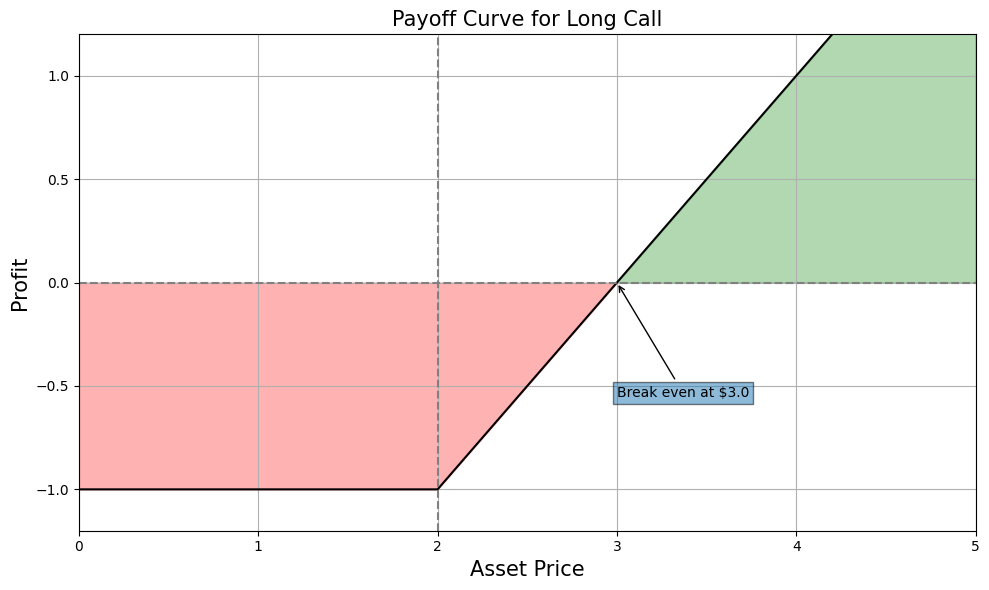

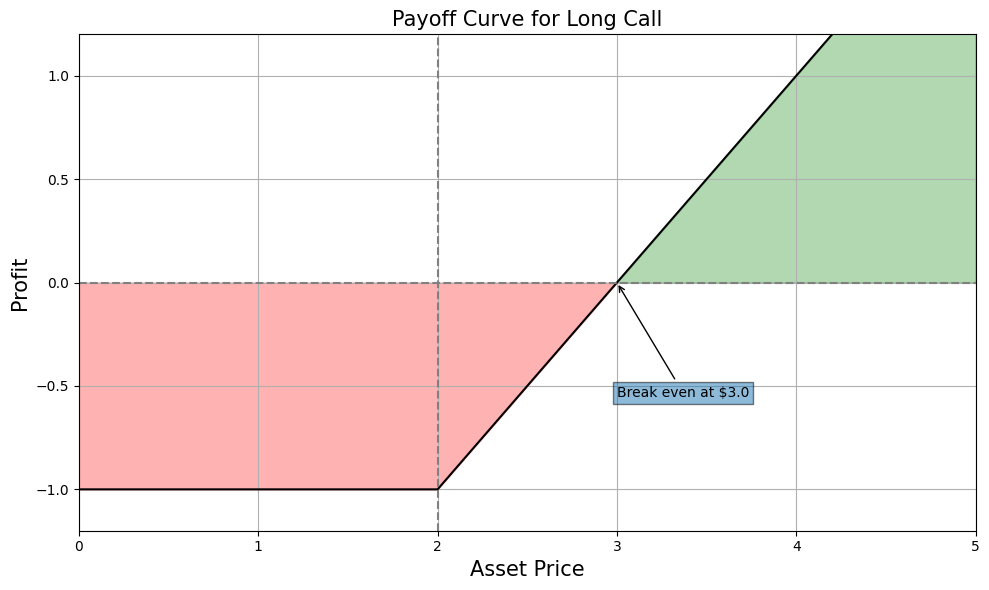

In [1]:
import numpy as np
from matplotlib import pyplot as plt
while True:
    selection = input("1: Long Call\n2: Long Put\n3: Short Call\n4: Short Put\nSelect which type of option: ")
    while True:
        if selection not in ["1", "2", "3", "4"]:
            print("Invalid selection.")
            selection = input("1: Long Call\n2: Long Put\n3: Short Call\n4: Short Put\nSelect which type of option: ")
        else:
            break

    strike = input("Enter strike price: $")
    while True:
        try:
            strike = float(strike)
            if strike <= 0:
                print("Strike price must be positive")
                strike = input("Enter strike price: $")
                continue
            break
        except ValueError:
            print("Invalid price")
            strike = input("Enter strike price: $")

    cost = input("Enter cost of option: $")
    while True:
        try:
            cost = float(cost)
            if cost <= 0:
                print("Cost must be positive")
                cost = input("Enter cost of option: $")
                continue
            break
        except ValueError:
            print("Invalid cost")
            cost = input("Enter cost of option: ")

    xvals = np.linspace(0, max(2.5 * strike, 2.5 * cost), 1001)
    yvals = []
    name = ""
    breakeven = 0
    if selection == "1":
        name = "Long Call"
        breakeven = strike + cost
        location = (breakeven, -.5 * cost)
        h = 'left'
        v = 'top'
        for i in xvals:
            yvals.append(max(i - strike - cost, -1 * cost))
    elif selection == "2":
        name = "Long Put"
        breakeven = strike - cost
        location = (breakeven, -.5 * cost)
        h = 'right'
        v = 'top'
        for i in xvals:
            yvals.append(max(strike - i - cost, -1 * cost))
    elif selection == "3":
        name = "Short Call"
        breakeven = strike + cost
        location = (breakeven, .5 * cost)
        h = 'left'
        v = 'bottom'
        for i in xvals:
            yvals.append(min(cost, cost - i + strike))
    else:
        name = "Short Put"
        breakeven = strike - cost
        location = (breakeven, .5 * cost)
        h = 'right'
        v = 'bottom'
        for i in xvals:
            yvals.append(min(cost, cost + i - strike))

    plt.figure(figsize=(10,6))
    plt.style.use('default')
    plt.plot(xvals, yvals, color="black")
    plt.plot(xvals, np.zeros(1001), color="gray", linestyle="--")
    plt.plot(np.ones(2) * strike, np.linspace(-1.2 * cost, 1.2 * cost, 2), color="gray", linestyle="--")
    plt.grid(True)
    plt.ylim((-1.2 * cost, 1.2 * cost))
    plt.xlim(0, max(2.5*strike, 2.5*cost))
    plt.fill_between(xvals, yvals, np.zeros(1001), where=(yvals > np.zeros(1001)), color="green", alpha=.3, interpolate=True)
    plt.fill_between(xvals, yvals, np.zeros(1001), where=(yvals < np.zeros(1001)), color="red", alpha=.3, interpolate=True)
    plt.title(f"Payoff Curve for {name}", fontsize=15)
    plt.ylabel("Profit", fontsize=15)
    plt.xlabel("Asset Price", fontsize=15)
    if selection in "24" and cost / strike > .6:
        h = 'center'
    if selection in "24" and cost / strike > .8:
     h= 'left'
    if selection == "1" or selection == "3" or strike > cost:
     plt.annotate(f"Break even at ${round(breakeven,2)}", xy=(breakeven, 0), xytext=location, ha=h, va=v, bbox=dict(boxstyle="square", alpha=.5), arrowprops=dict(arrowstyle="->"))
    plt.tight_layout()
    plt.show()
    choice = input("Press ENTER to make another graph or \"quit\" then ENTER to quit")
    if choice == "quit":
        break